In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
file_path = 'C:/Users/unava/Desktop/data analysis project/laptops_train.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

In [3]:
df['Operating System Version'] = df['Operating System Version'].fillna('Unknown')

In [78]:
df.head(100)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,Unknown,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,Unknown,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,Unknown,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,Unknown,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,Unknown,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Acer,Spin 5,2 in 1 Convertible,"13.3""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows,10,1.5kg,7531524.00
96,Dell,Inspiron 3567,Notebook,"15.6""",Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,Unknown,2.2kg,5334310.80
97,Dell,Inspiron 3567,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Linux,Unknown,2.2kg,4312620.00
98,Asus,X541UV-DM1439T (i3-7100U/6GB/256GB/GeForce,Notebook,"15.6""",Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,6GB,256GB SSD,Nvidia GeForce 920M,Windows,10,2kg,5130684.00


In [79]:
rows_with_missing = df[df.applymap(lambda x: pd.isnull(x) or (isinstance(x, str) and x.strip() == '')).any(axis=1)]
print("\nRows with missing or blank/whitespace-only values:")
print(rows_with_missing)



Rows with missing or blank/whitespace-only values:
Empty DataFrame
Columns: [Manufacturer, Model Name, Category, Screen Size, Screen, CPU, RAM, Storage, GPU, Operating System, Operating System Version, Weight, Price]
Index: []


C:\Users\unava\AppData\Local\Temp\ipykernel_27396\874357245.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_missing = df[df.applymap(lambda x: pd.isnull(x) or (isinstance(x, str) and x.strip() == '')).any(axis=1)]


In [80]:
df['RAM'] = df['RAM'].str.replace('GB', '').astype(int)
df['Screen Size'] = df['Screen Size'].str.replace('"', '').astype(float)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [81]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,Unknown,1.37,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,Unknown,1.34,7993374.48
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,Unknown,1.86,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,Unknown,1.83,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,Unknown,1.37,16037611.20


In [82]:
summary_stats = df[['Price', 'Screen Size', 'RAM', 'Weight']].describe()

In [83]:
print(summary_stats)

              Price  Screen Size         RAM      Weight
count  9.770000e+02    977.00000  977.000000  977.000000
mean   1.001899e+07     15.05261    8.528147    2.039128
std    6.306430e+06      1.41895    4.997487    0.666009
min    1.706375e+06     10.10000    2.000000    0.690000
25%    5.326308e+06     14.00000    4.000000    1.500000
50%    8.527428e+06     15.60000    8.000000    2.020000
75%    1.311570e+07     15.60000    8.000000    2.300000
max    5.423231e+07     18.40000   32.000000    4.700000


In [84]:
missing_values = df.isnull().sum()
print(missing_values)

Manufacturer                0
Model Name                  0
Category                    0
Screen Size                 0
Screen                      0
CPU                         0
RAM                         0
Storage                     0
GPU                         0
Operating System            0
Operating System Version    0
Weight                      0
Price                       0
dtype: int64


In [85]:
df.fillna(value={'Price': df['Price'].mean()}, inplace=True)

In [86]:
avg_price_by_category = df.groupby('Category')['Price'].mean().astype(int)
print(avg_price_by_category)

Category
2 in 1 Convertible    11545889
Gaming                15558567
Netbook                5052695
Notebook               6926965
Ultrabook             13864713
Workstation           19880663
Name: Price, dtype: int32


In [87]:
avg_price_by_manufacturer = df.groupby('Manufacturer')['Price'].mean().astype(int)
print(avg_price_by_manufacturer)

Manufacturer
Acer          5611078
Apple        14722625
Asus          9527370
Chuwi         2794725
Dell         11067538
Fujitsu       6837948
Google       14917812
HP            9088834
Huawei       12662208
LG           18664308
Lenovo        9630774
MSI          15914441
Mediacom      2623140
Microsoft    14336645
Razer        33602868
Samsung      13406913
Toshiba      10917552
Vero          2058053
Xiaomi       10078748
Name: Price, dtype: int32


In [88]:
numerical_cols = ['Screen Size', 'RAM', 'Weight', 'Price']
correlation_matrix = df[numerical_cols].corr()

In [89]:
print(correlation_matrix)

             Screen Size       RAM    Weight     Price
Screen Size     1.000000  0.232315  0.822261  0.075152
RAM             0.232315  1.000000  0.390161  0.764005
Weight          0.822261  0.390161  1.000000  0.224415
Price           0.075152  0.764005  0.224415  1.000000


In [90]:
df['Price per GB RAM'] = df['Price'] / df['RAM']

In [91]:
df['Screen Area'] = (df['Screen Size'] ** 2) / (16**2 + 9**2)

In [92]:
X = df[['RAM', 'Weight']].values
y = df['Price'].values

In [93]:
X_mean, y_mean = np.mean(X, axis=0), np.mean(y)
slope_RAM = np.sum((X[:, 0] - X_mean[0]) * (y - y_mean)) / np.sum((X[:, 0] - X_mean[0])**2)
slope_Weight = np.sum((X[:, 1] - X_mean[1]) * (y - y_mean)) / np.sum((X[:, 1] - X_mean[1])**2)
intercept = y_mean - slope_RAM * X_mean[0] - slope_Weight * X_mean[1]


In [94]:
df['Predicted Price'] = slope_RAM * df['RAM'] + slope_Weight * df['Weight'] + intercept



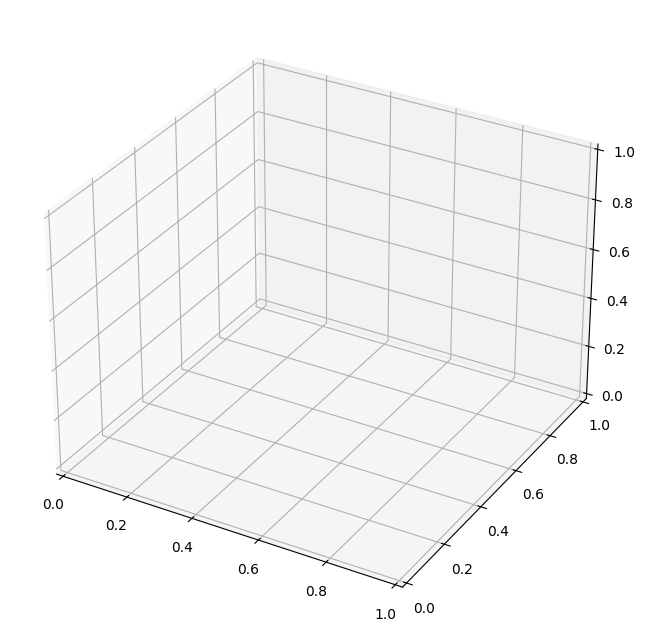

In [95]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

In [96]:
ax.scatter(df['RAM'], df['Weight'], df['Price'], color='b', label='Actual Price', alpha=0.6)

In [97]:
ax.scatter(df['RAM'], df['Weight'], df['Predicted Price'], color='r', label='Predicted Price', alpha=0.6)

In [98]:
ax.set_xlabel('RAM (GB)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Price (Euro)')
ax.set_title('Actual vs Predicted Prices of Laptops')
ax.legend()
plt.show()

In [99]:
print("Checking for NaN or Infinite values in Price, RAM, and Weight:")
print("NaN in Price:", np.any(np.isnan(df['Price'])))
print("NaN in Predicted Price:", np.any(np.isnan(df['Predicted Price'])))
print("NaN in RAM:", np.any(np.isnan(df['RAM'])))
print("NaN in Weight:", np.any(np.isnan(df['Weight'])))
print("Infinite in Price:", np.any(np.isinf(df['Price'])))
print("Infinite in Predicted Price:", np.any(np.isinf(df['Predicted Price'])))
print("Infinite in RAM:", np.any(np.isinf(df['RAM'])))
print("Infinite in Weight:", np.any(np.isinf(df['Weight'])))

Checking for NaN or Infinite values in Price, RAM, and Weight:
NaN in Price: False
NaN in Predicted Price: False
NaN in RAM: False
NaN in Weight: False
Infinite in Price: False
Infinite in Predicted Price: False
Infinite in RAM: False
Infinite in Weight: False


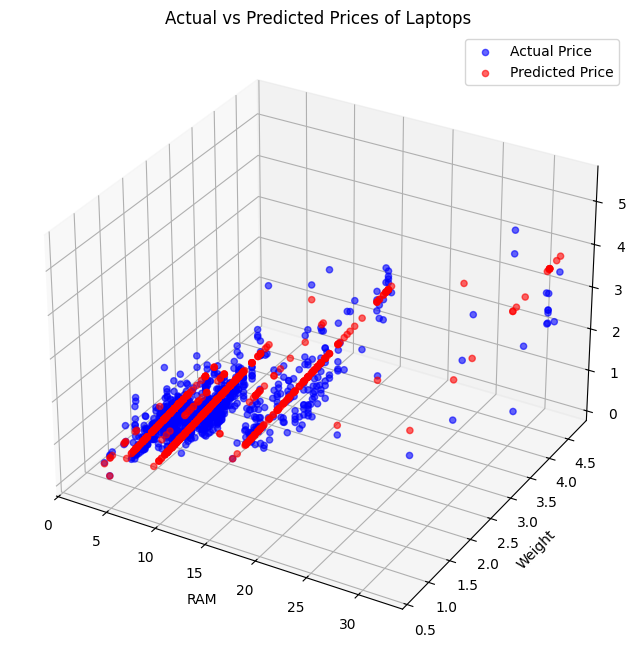

In [100]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual prices
ax.scatter(df['RAM'], df['Weight'], df['Price'], 
           color='b', label='Actual Price', alpha=0.6)

# Ensure 'Predicted Price' exists in the dataset
if 'Predicted Price' in df.columns:
    # Scatter plot for predicted prices
    ax.scatter(df['RAM'], df['Weight'], df['Predicted Price'], 
               color='r', label='Predicted Price', alpha=0.6)

# Set axis labels
ax.set_xlabel('RAM')
ax.set_ylabel('Weight')
ax.set_zlabel('Price')

# Set title and legend
ax.set_title('Actual vs Predicted Prices of Laptops')
ax.legend()

# Show the plot
plt.show()

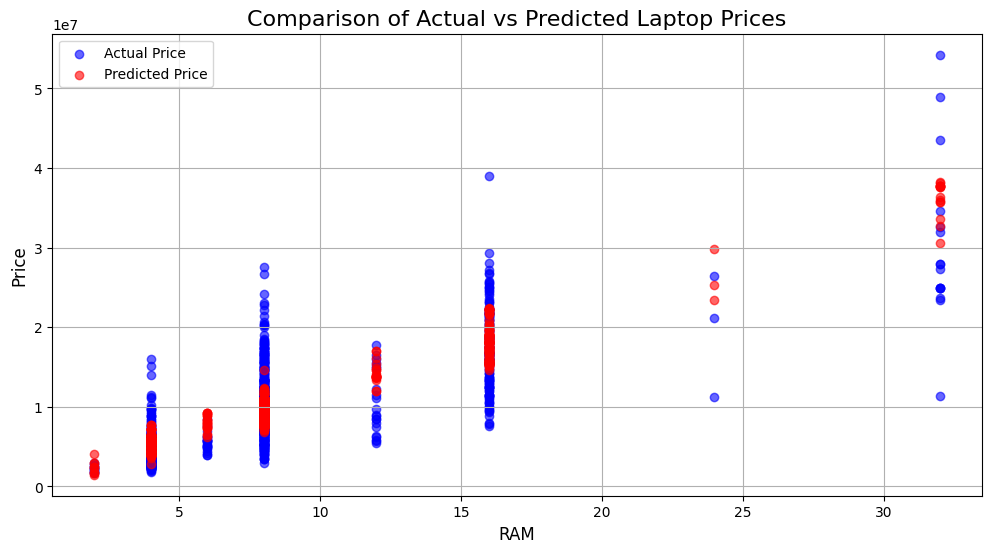

In [101]:
if 'Predicted Price' in df.columns:
    plt.figure(figsize=(12, 6))

    # Scatter plot for Actual Prices
    plt.scatter(df['RAM'], df['Price'], color='blue', label='Actual Price', alpha=0.6)

    # Scatter plot for Predicted Prices
    plt.scatter(df['RAM'], df['Predicted Price'], color='red', label='Predicted Price', alpha=0.6)

    # Add labels, title, and legend
    plt.xlabel('RAM', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.title('Comparison of Actual vs Predicted Laptop Prices', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Column 'Predicted Price' not found in the dataset. Please add it to proceed.")

In [102]:
pivot_table = df.pivot_table(values='Price', index='Manufacturer', columns='Category', aggfunc='mean')
print("Pivot Tablo:\n", pivot_table)

Pivot Tablo:
 Category      2 in 1 Convertible        Gaming     Netbook      Notebook  \
Manufacturer                                                               
Acer                5.641352e+06  1.168705e+07   3014388.0  5.038336e+06   
Apple                        NaN           NaN         NaN           NaN   
Asus                8.072461e+06  1.482596e+07   2302731.6  5.595232e+06   
Chuwi                        NaN           NaN         NaN  2.794726e+06   
Dell                9.933991e+06  1.772490e+07   4619394.0  8.158519e+06   
Fujitsu                      NaN           NaN         NaN  6.837948e+06   
Google                       NaN           NaN         NaN           NaN   
HP                  1.287139e+07  1.339224e+07  10950498.0  6.762839e+06   
Huawei                       NaN           NaN         NaN           NaN   
LG                           NaN           NaN         NaN           NaN   
Lenovo              1.456665e+07  1.068859e+07   3832452.0  6.912281e+06  

In [103]:
nan_counts = df.isnull().sum()
print(nan_counts)

Manufacturer                0
Model Name                  0
Category                    0
Screen Size                 0
Screen                      0
CPU                         0
RAM                         0
Storage                     0
GPU                         0
Operating System            0
Operating System Version    0
Weight                      0
Price                       0
Price per GB RAM            0
Screen Area                 0
Predicted Price             0
dtype: int64


In [104]:
# Total number of NaN values in the DataFrame
total_nan = df.isnull().sum().sum()
print("Total NaN values in the DataFrame:", total_nan)

Total NaN values in the DataFrame: 0
